In [105]:
import pandas as pd
import seaborn as sns
import os
import requests
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [106]:
#download file
def download_file(url):
    filename = url.split('/')[-1]
    if not os.path.exists(filename):
        response = requests.get(url)
        open(filename, 'wb').write(response.content)
        print(f'{filename} downloaded')
    else:
        print(f'{filename} already exists')

In [107]:
download_file('https://raw.githubusercontent.com/t-davidson/hate-speech-and-offensive-language/master/data/labeled_data.csv')


labeled_data.csv already exists


In [108]:
# Read the CSV file

df = pd.read_csv("labeled_data.csv", usecols=["class", "tweet"])

# Add a new column 'tweet_id' with row numbers
df['tweet_id'] = df.index + 1

# Reorder the columns
df = df[['tweet_id', 'class', 'tweet']]

# Display the modified DataFrame
print(df.head())
print(f"[Train] the dataframe shape: {df.shape}")

   tweet_id  class                                              tweet
0         1      2  !!! RT @mayasolovely: As a woman you shouldn't...
1         2      1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2         3      1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3         4      1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4         5      1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
[Train] the dataframe shape: (24783, 3)


In [109]:
count_rows = len(df[df['class'] == 1])
print(count_rows)

19190


In [110]:
#offensive=1
#hatespeech=0
#neither=2

In [111]:
#splitting to train and test.
train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['class'] )

In [112]:
train

,tweet_id,class,tweet
21283,21284,1,Talking Angela is a hoe
12619,12620,1,Lol they tricking niccas left n right
975,976,1,&#128514;&#128514; bitches get stuff done. htt...
2481,2482,1,@ArtaleGaspare bitch i got the flameeee
7263,7264,1,@vivaalakatyy @brotherbill7 @JHuff_5 good bitc...
...,...,...,...
17048,17049,2,RT @RayIopez: When you're approaching your hig...
7044,7045,1,@skyereyes_ @keanabermudez YOOOOOOOOOOOOOO LMF...
15978,15979,2,RT @KelsieBelsi: @Vntxnius lmao it will have a...
23034,23035,1,"Y'all hoes broke, be stealing from the mall bu..."


In [113]:
test

,tweet_id,class,tweet
15814,15815,1,RT @JimNorton: There is a GIFT SHOP at the 9-1...
3158,3159,2,@Fabulousjonna_ I need some red green &amp; ye...
24587,24588,1,this the one&#128076;RT @SumthinNueee hoes don...
360,361,1,"""@lildurk_: I can turn yo bitch into a eaterrr..."
16123,16124,1,RT @LUNAraps: smh u got Ebola now RT&#8220;@Br...
...,...,...,...
7975,7976,1,Because of the message that sends to LGBTQ res...
8208,8209,1,Bruh this niggah always falls asleep ! &#12853...
583,584,0,"""We're out here, and we're queer!""\n"" 2, 4, 6,..."
17811,17812,1,RT @TooTurntNacho: Why give a bitch ya heart w...


In [114]:
train['tweet']

21283                              Talking Angela is a hoe
12619                Lol they tricking niccas left n right
975      &#128514;&#128514; bitches get stuff done. htt...
2481               @ArtaleGaspare bitch i got the flameeee
7263     @vivaalakatyy @brotherbill7 @JHuff_5 good bitc...
                               ...                        
17048    RT @RayIopez: When you're approaching your hig...
7044     @skyereyes_ @keanabermudez YOOOOOOOOOOOOOO LMF...
15978    RT @KelsieBelsi: @Vntxnius lmao it will have a...
23034    Y'all hoes broke, be stealing from the mall bu...
6074     @hazelinaaax3 @olivia_hrbek @kristiexox3 fuck ...
Name: tweet, Length: 19826, dtype: object

In [115]:

#process each tweet in the train and test sets by removing punctuations,stop words etc
import string
from nltk.corpus import stopwords
import pandas as pd



# Function to preprocess a single tweet
def preprocess_tweet(tweet):
    # Remove HTML entities
    tweet = str(tweet)  # Convert to string
    
    # Remove 'RT' (retweet) from the tweet
    tweet = tweet.replace('RT', '')

    # Remove punctuation
    translator = str.maketrans('', '', string.punctuation + string.digits)
    tweet = tweet.translate(translator)

    # Convert to lowercase
    tweet = tweet.lower()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = tweet.split()
    words = [word for word in words if word not in stop_words]

    # Join the words back into a processed tweet
    processed_tweet = ' '.join(words)

    return processed_tweet

# Apply the preprocess_tweet function to the 'tweet' column
train['processed_tweet'] = train['tweet'].apply(preprocess_tweet)

# Display the processed DataFrame
print(train[['tweet', 'processed_tweet']])


                                                   tweet  \
21283                            Talking Angela is a hoe   
12619              Lol they tricking niccas left n right   
975    &#128514;&#128514; bitches get stuff done. htt...   
2481             @ArtaleGaspare bitch i got the flameeee   
7263   @vivaalakatyy @brotherbill7 @JHuff_5 good bitc...   
...                                                  ...   
17048  RT @RayIopez: When you're approaching your hig...   
7044   @skyereyes_ @keanabermudez YOOOOOOOOOOOOOO LMF...   
15978  RT @KelsieBelsi: @Vntxnius lmao it will have a...   
23034  Y'all hoes broke, be stealing from the mall bu...   
6074   @hazelinaaax3 @olivia_hrbek @kristiexox3 fuck ...   

                                         processed_tweet  
21283                                 talking angela hoe  
12619                   lol tricking niccas left n right  
975                bitches get stuff done httptcogvfpkah  
2481                    artalegaspare bitch

C:\Users\chyr8\AppData\Local\Temp/ipykernel_62460/4277186645.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['processed_tweet'] = train['tweet'].apply(preprocess_tweet)


In [116]:
# Apply the preprocess_tweet function to the 'tweet' column
test['processed_tweet'] = test['tweet'].apply(preprocess_tweet)

# Display the processed DataFrame
print(test[['tweet', 'processed_tweet']])

                                                   tweet  \
15814  RT @JimNorton: There is a GIFT SHOP at the 9-1...   
3158   @Fabulousjonna_ I need some red green &amp; ye...   
24587  this the one&#128076;RT @SumthinNueee hoes don...   
360    "@lildurk_: I can turn yo bitch into a eaterrr...   
16123  RT @LUNAraps: smh u got Ebola now RT&#8220;@Br...   
...                                                  ...   
7975   Because of the message that sends to LGBTQ res...   
8208   Bruh this niggah always falls asleep ! &#12853...   
583    "We're out here, and we're queer!"\n" 2, 4, 6,...   
17811  RT @TooTurntNacho: Why give a bitch ya heart w...   
16594  RT @NYRKelsMads: Almost forgot. Posing as an o...   

                                         processed_tweet  
15814  jimnorton gift shop museum charge admission ma...  
3158   fabulousjonna need red green amp yellow pants ...  
24587  one sumthinnueee hoes dont wantin ya nigga wan...  
360                  lildurk turn yo bitch 

C:\Users\chyr8\AppData\Local\Temp/ipykernel_62460/1053705653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['processed_tweet'] = test['tweet'].apply(preprocess_tweet)


In [117]:
train

,tweet_id,class,tweet,processed_tweet
21283,21284,1,Talking Angela is a hoe,talking angela hoe
12619,12620,1,Lol they tricking niccas left n right,lol tricking niccas left n right
975,976,1,&#128514;&#128514; bitches get stuff done. htt...,bitches get stuff done httptcogvfpkah
2481,2482,1,@ArtaleGaspare bitch i got the flameeee,artalegaspare bitch got flameeee
7263,7264,1,@vivaalakatyy @brotherbill7 @JHuff_5 good bitc...,vivaalakatyy brotherbill jhuff good bitch choke
...,...,...,...,...
17048,17049,2,RT @RayIopez: When you're approaching your hig...,rayiopez youre approaching high score flappy b...
7044,7045,1,@skyereyes_ @keanabermudez YOOOOOOOOOOOOOO LMF...,skyereyes keanabermudez yoooooooooooooo lmfaoo...
15978,15979,2,RT @KelsieBelsi: @Vntxnius lmao it will have a...,kelsiebelsi vntxnius lmao slope x
23034,23035,1,"Y'all hoes broke, be stealing from the mall bu...",yall hoes broke stealing mall flexing


In [118]:
test

,tweet_id,class,tweet,processed_tweet
15814,15815,1,RT @JimNorton: There is a GIFT SHOP at the 9-1...,jimnorton gift shop museum charge admission ma...
3158,3159,2,@Fabulousjonna_ I need some red green &amp; ye...,fabulousjonna need red green amp yellow pants ...
24587,24588,1,this the one&#128076;RT @SumthinNueee hoes don...,one sumthinnueee hoes dont wantin ya nigga wan...
360,361,1,"""@lildurk_: I can turn yo bitch into a eaterrr...",lildurk turn yo bitch eaterrrrrrrrr
16123,16124,1,RT @LUNAraps: smh u got Ebola now RT&#8220;@Br...,lunaraps smh u got ebola bryanroxall stick foo...
...,...,...,...,...
7975,7976,1,Because of the message that sends to LGBTQ res...,message sends lgbtq residents state west virgi...
8208,8209,1,Bruh this niggah always falls asleep ! &#12853...,bruh niggah always falls asleep
583,584,0,"""We're out here, and we're queer!""\n"" 2, 4, 6,...",queer hut like butt
17811,17812,1,RT @TooTurntNacho: Why give a bitch ya heart w...,tooturntnacho give bitch ya heart rather purse


In [119]:
train["processed_tweet"]

21283                                   talking angela hoe
12619                     lol tricking niccas left n right
975                  bitches get stuff done httptcogvfpkah
2481                      artalegaspare bitch got flameeee
7263       vivaalakatyy brotherbill jhuff good bitch choke
                               ...                        
17048    rayiopez youre approaching high score flappy b...
7044     skyereyes keanabermudez yoooooooooooooo lmfaoo...
15978                    kelsiebelsi vntxnius lmao slope x
23034                yall hoes broke stealing mall flexing
6074     hazelinaaax oliviahrbek kristiexox fuck olive ...
Name: processed_tweet, Length: 19826, dtype: object

In [120]:
#vocabulary of top 200 most common words in the train set
from collections import Counter

words_list=[]
most_freq_vocab=[]

for index, row in train.iterrows():
    tweet_id = row['tweet_id']
    processed_tweet = row['processed_tweet']
    
    words = processed_tweet.split()
    
    words_list.extend(words)
        
word_freq = Counter(words_list)

# Create a vocab of the top 200 most frequent words

for word,freq in word_freq.most_common(200):
    most_freq_vocab.append(word)

print(most_freq_vocab)
print(len(words_list))
print(len(most_freq_vocab))
    

['bitch', 'bitches', 'like', 'hoes', 'pussy', 'im', 'hoe', 'dont', 'ass', 'fuck', 'get', 'got', 'u', 'shit', 'nigga', 'aint', 'trash', 'lol', 'amp', 'niggas', 'know', 'one', 'love', 'cant', 'yall', 'go', 'yo', 'fucking', 'thats', 'youre', 'want', 'bad', 'man', 'good', 'make', 'ya', 'hate', 'say', 'still', 'look', 'see', 'think', 'back', 'need', 'faggot', 'time', 'really', 'never', 'people', 'girl', 'real', 'right', 'said', 'bird', 'even', 'would', 'white', 'lmao', 'wit', 'let', 'wanna', 'bout', 'tell', 'day', 'little', 'damn', 'dick', 'stop', 'gotta', 'charlie', 'ill', 'yankees', 'call', 'come', 'talk', 'cause', 'new', 'girls', 'every', 'take', 'life', 'going', 'money', 'always', 'gonna', 'eat', 'n', 'da', 'better', 'niggah', 'dat', 'ghetto', 'give', 'twitter', 'dumb', 'fuckin', 'ever', 'retarded', 'put', 'talking', 'tho', 'ur', 'big', 'lil', 'nigger', 'ugly', 'yellow', 'stupid', 'cunt', 'keep', 'much', 'way', 'fat', 'fag', 'birds', 'getting', 'hit', 'yeah', 'hes', 'black', 'well', 'ga

In [121]:
vocabulary=most_freq_vocab

In [123]:

#inverted index with the following info for each word in the vocabulary :1)the list of tweets the word appears in 2) freq of word in each tweet.

from collections import Counter
import pandas as pd



# Create an empty dictionary to store the inverted index
inverted_index = {}

# Iterate through rows of the 'processed_tweet' column
for index, row in train.iterrows():
    tweet_id = row['tweet_id']
    processed_tweet = row['processed_tweet']
    
    # Split the processed tweet string into a list of words
    words = processed_tweet.split()
    
    # Count the frequency of each word in the tweet
    word_freq = Counter(words)
    
    # Update the inverted index for each word
    for word, freq in word_freq.items():
        if word in vocabulary:
            
            if word not in inverted_index:
                inverted_index[word] = {'tweet_ids': [tweet_id],
                                        'freq_in_tweet': [freq], 
                                        
                                       }
            else:
                inverted_index[word]['tweet_ids'].append(tweet_id)
                inverted_index[word]['freq_in_tweet'].append(freq)

# Display the inverted index
for word, info in inverted_index.items():
    print(f"Word: {word}")
    print(f"Tweet IDs: {info['tweet_ids']}")
    print(f"Frequencies: {info['freq_in_tweet']}")
    print("=" * 20)


Word: talking
Tweet IDs: [21284, 3446, 9319, 18994, 5261, 13056, 6410, 22876, 4100, 2818, 12002, 21210, 131, 18247, 21743, 18351, 23388, 3880, 8802, 3827, 19514, 6483, 11567, 20371, 18878, 6417, 5498, 5688, 3665, 9854, 11107, 11347, 23990, 13387, 23309, 20990, 6402, 6104, 13212, 14401, 17772, 15240, 24485, 6003, 20281, 7645, 11381, 6432, 13966, 22889, 16135, 19277, 1217, 21349, 9794, 5289, 17732, 12615, 21296, 464, 16311, 6928, 347, 4659, 6469, 17279, 24267, 7871, 16903, 2500, 21624, 5191, 22922, 24244, 6001, 2521, 5679, 18011, 11863, 12594, 15614, 11601, 24772, 10305, 4915, 15052, 13719, 13102, 9009, 1343, 4291, 21434, 7225, 11831, 21977, 14694, 19345, 10886, 6444, 15032, 24698, 5269, 23918, 1034, 11065, 955, 11697, 19382, 202, 6378, 4600, 13207, 6555, 6468, 6004, 10847, 8062, 14432, 22135, 6459, 6433, 3685, 22485, 16501, 942, 23792, 9234, 12558, 8361, 24635, 3998, 6063, 21723, 17843, 24330, 5772, 10514, 12314, 19706, 21923, 15608, 22091, 6889, 13084, 12026, 21221, 16536, 11015, 1491,

In [124]:
print(len(inverted_index))

200


In [129]:
# sample model to get the most similar tweet from the train set for a sample input tweet and predict its class from the matched tweet.

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd



# Input tweet
input_tweet = "Lol they tricking niccas left n right"

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train['processed_tweet'])
X_input = vectorizer.transform([input_tweet])

# Calculate cosine similarity between the input tweet and each tweet in the training set
similarities = cosine_similarity(X_input, X_train)

# Find the index of the most similar tweet
most_similar_index = similarities.argmax()



# Get the label of the most similar tweet
predicted_label = train.loc[most_similar_index, 'class']

print(f"Predicted Label: {predicted_label}")


Predicted Label: 1


In [142]:
#previous model applied to all the tweets in the text set.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train['processed_tweet'])

# Initialize an empty list to store predicted labels
predicted_labels = []

# Loop through each tweet in the test set
for index, row in test.iterrows():
    input_tweet = row['processed_tweet']
    
    # Vectorize the input tweet
    X_input = vectorizer.transform([input_tweet])

    # Calculate cosine similarity between the input tweet and each tweet in the training set
    similarities = cosine_similarity(X_input, X_train)

    # Find the index of the most similar tweet
    most_similar_index = similarities.argmax()
    
    most_similar_tweet_info = train.iloc[most_similar_index]
    predict=most_similar_tweet_info['class']
    
    predicted_labels.append(predict)

# Add the predicted labels to the test DataFrame
test['predicted_class'] = predicted_labels

# Display the test DataFrame with predicted labels
print(test)


       tweet_id  class                                              tweet  \
15814     15815      1  RT @JimNorton: There is a GIFT SHOP at the 9-1...   
3158       3159      2  @Fabulousjonna_ I need some red green &amp; ye...   
24587     24588      1  this the one&#128076;RT @SumthinNueee hoes don...   
360         361      1  "@lildurk_: I can turn yo bitch into a eaterrr...   
16123     16124      1  RT @LUNAraps: smh u got Ebola now RT&#8220;@Br...   
...         ...    ...                                                ...   
7975       7976      1  Because of the message that sends to LGBTQ res...   
8208       8209      1  Bruh this niggah always falls asleep ! &#12853...   
583         584      0  "We're out here, and we're queer!"\n" 2, 4, 6,...   
17811     17812      1  RT @TooTurntNacho: Why give a bitch ya heart w...   
16594     16595      1  RT @NYRKelsMads: Almost forgot. Posing as an o...   

                                         processed_tweet  predicted_class  

C:\Users\chyr8\AppData\Local\Temp/ipykernel_62460/129682448.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted_class'] = predicted_labels


In [143]:
print(test[['class','predicted_class', 'processed_tweet']])

       class  predicted_class  \
15814      1                1   
3158       2                1   
24587      1                1   
360        1                1   
16123      1                1   
...      ...              ...   
7975       1                1   
8208       1                1   
583        0                1   
17811      1                1   
16594      1                1   

                                         processed_tweet  
15814  jimnorton gift shop museum charge admission ma...  
3158   fabulousjonna need red green amp yellow pants ...  
24587  one sumthinnueee hoes dont wantin ya nigga wan...  
360                  lildurk turn yo bitch eaterrrrrrrrr  
16123  lunaraps smh u got ebola bryanroxall stick foo...  
...                                                  ...  
7975   message sends lgbtq residents state west virgi...  
8208                     bruh niggah always falls asleep  
583                                  queer hut like butt  
17811     too

In [128]:
class_labels = sorted(test['class'].unique())
print(class_labels)

[0, 1, 2]


In [144]:
class_labels = sorted(test['predicted_class'].unique())
print(class_labels)

[0, 1, 2]


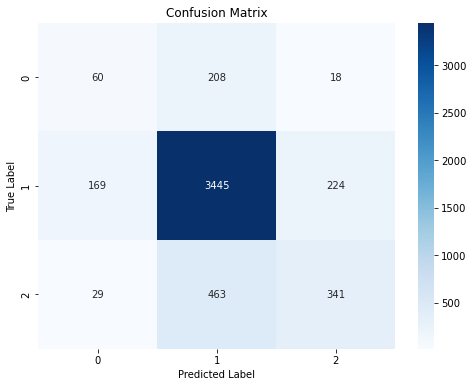

Accuracy: 0.7759
Precision:
[0.23255814 0.83697765 0.58490566]
Recall:
[0.20979021 0.89760292 0.40936375]
F1-Score:
[0.22058824 0.86623083 0.48163842]


In [145]:
#model evaluation

from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix



# Extract true labels and predicted labels
true_labels = test['class']
predicted_labels = test['predicted_class']

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Get class labels
class_labels = sorted(test['class'].unique())

# Calculate precision, recall, and F1-score for each class
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, labels=class_labels)

# Display the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Display the numeric values of accuracy, precision, recall, and F1-score
print(f"Accuracy: {accuracy_score(true_labels, predicted_labels):.4f}")
print("Precision:")
print(precision)
print("Recall:")
print(recall)
print("F1-Score:")
print(f1)
